In [1]:
import os 

print(os.getcwd())
print(os.listdir('.'))
print(os.listdir('../tutorial'))

c:\Users\USUARIO\OneDrive\Documentos\VS\pandas_numpy
['data', 'tutorial_1.ipynb']
['julia_ds.ipynb', 'julia_test.jl', 'mydata.txt', 'python.ipynb']


In [2]:
#Create a new directory
#os.makedirs('./data', exist_ok=True)
print('python.ipynb' in os.listdir('../tutorial'))

True


In [3]:
import urllib.request

url1 = 'https://gist.githubusercontent.com/aakashns/257f6e6c8719c17d0e498ea287d1a386/raw/7def9ef4234ddf0bc82f855ad67dac8b971852ef/loans1.txt'
url2 = 'https://gist.githubusercontent.com/aakashns/257f6e6c8719c17d0e498ea287d1a386/raw/7def9ef4234ddf0bc82f855ad67dac8b971852ef/loans2.txt'
url3 = 'https://gist.githubusercontent.com/aakashns/257f6e6c8719c17d0e498ea287d1a386/raw/7def9ef4234ddf0bc82f855ad67dac8b971852ef/loans3.txt'

#urllib.request.urlretrieve(url1, './data/loans1.txt')
#urllib.request.urlretrieve(url2, './data/loans2.txt')
#urllib.request.urlretrieve(url3, './data/loans3.txt')
print(os.listdir('./data'))

['italy-covid-daywise.csv', 'loans1.txt', 'loans2.txt', 'loans3.txt']


In [4]:
file1 = open('./data/loans1.txt', mode='r')
file1_contents = file1.read()
print(file1_contents)
file1.close()

amount,duration,rate,down_payment
100000,36,0.08,20000
200000,12,0.1,
628400,120,0.12,100000
4637400,240,0.06,
42900,90,0.07,8900
916000,16,0.13,
45230,48,0.08,4300
991360,99,0.08,
423000,27,0.09,47200


In [5]:
##Closing files automatically using with
with open('./data/loans2.txt') as file2:
    file2_contents = file2.read()
    print(file2_contents)

amount,duration,rate,down_payment
828400,120,0.11,100000
4633400,240,0.06,
42900,90,0.08,8900
983000,16,0.14,
15230,48,0.07,4300


In [6]:
##Reading a file line by line
with open('./data/loans3.txt', 'r') as file3:
    file3_lines = file3.readlines()
print(file3_lines)

['amount,duration,rate,down_payment\n', '45230,48,0.07,4300\n', '883000,16,0.14,\n', '100000,12,0.1,\n', '728400,120,0.12,100000\n', '3637400,240,0.06,\n', '82900,90,0.07,8900\n', '316000,16,0.13,\n', '15230,48,0.08,4300\n', '991360,99,0.08,\n', '323000,27,0.09,4720010000,36,0.08,20000\n', '528400,120,0.11,100000\n', '8633400,240,0.06,\n', '12900,90,0.08,8900']


In [7]:
##Pandas
from urllib.request import urlretrieve
import pandas as pd

urlretrieve('https://hub.jovian.ml/wp-content/uploads/2020/09/italy-covid-daywise.csv', 
            './data/italy-covid-daywise.csv')
covid_df = pd.read_csv('./data/italy-covid-daywise.csv')
covid_df.head()

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN


In [8]:
#Info about columns of dataframe
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


In [9]:
#Type
type(covid_df)

pandas.core.frame.DataFrame

In [10]:
#Summary statistics
covid_df.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


In [11]:
covid_df.columns

Index(['date', 'new_cases', 'new_deaths', 'new_tests'], dtype='object')

In [12]:
covid_df.shape

(248, 4)

In [13]:
cases_df = covid_df[['date', 'new_cases']]
cases_df

,date,new_cases
0,2019-12-31,0.0
1,2020-01-01,0.0
2,2020-01-02,0.0
3,2020-01-03,0.0
4,2020-01-04,0.0
...,...,...
243,2020-08-30,1444.0
244,2020-08-31,1365.0
245,2020-09-01,996.0
246,2020-09-02,975.0


In [14]:
#Specific value
covid_df.at[246, 'new_cases']

975.0

In [ ]:
#The data within covid_df_copy is completely separate from covid_df, and changing values inside one of them will not affect the other.
covid_df_copy = covid_df.copy()

In [15]:
covid_df.tail(4)

,date,new_cases,new_deaths,new_tests
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN
247,2020-09-03,1326.0,6.0,NaN


In [16]:
#Random sample
covid_df.sample(10)

,date,new_cases,new_deaths,new_tests
226,2020-08-13,476.0,10.0,25629.0
88,2020-03-28,5959.0,971.0,NaN
241,2020-08-28,1409.0,5.0,65135.0
178,2020-06-26,296.0,34.0,28331.0
24,2020-01-24,0.0,0.0,NaN
55,2020-02-24,53.0,0.0,NaN
218,2020-08-05,190.0,5.0,29739.0
219,2020-08-06,384.0,10.0,32169.0
19,2020-01-19,0.0,0.0,NaN
193,2020-07-11,276.0,12.0,25449.0


In [17]:
#New column
covid_df['positive_rate'] = covid_df.new_cases / covid_df.new_tests

In [18]:
#Delete a column
covid_df.drop(columns=['positive_rate'], inplace=True)

In [20]:
#Sort by column
covid_df.sort_values('new_cases', ascending=False).head(10)

,date,new_cases,new_deaths,new_tests
82,2020-03-22,6557.0,795.0,NaN
87,2020-03-27,6153.0,660.0,NaN
81,2020-03-21,5986.0,625.0,NaN
89,2020-03-29,5974.0,887.0,NaN
88,2020-03-28,5959.0,971.0,NaN
83,2020-03-23,5560.0,649.0,NaN
80,2020-03-20,5322.0,429.0,NaN
85,2020-03-25,5249.0,743.0,NaN
90,2020-03-30,5217.0,758.0,NaN
86,2020-03-26,5210.0,685.0,NaN


In [21]:
#Interpolate a value
covid_df.at[172, 'new_cases'] = (covid_df.at[171, 'new_cases'] + covid_df.at[173, 'new_cases'])/2

In [22]:
covid_df.date

0      2019-12-31
1      2020-01-01
2      2020-01-02
3      2020-01-03
4      2020-01-04
          ...    
243    2020-08-30
244    2020-08-31
245    2020-09-01
246    2020-09-02
247    2020-09-03
Name: date, Length: 248, dtype: object

In [23]:
#Cast date
covid_df['date'] = pd.to_datetime(covid_df.date)

In [24]:
#Extract date
covid_df['year'] = pd.DatetimeIndex(covid_df.date).year
covid_df['month'] = pd.DatetimeIndex(covid_df.date).month
covid_df['day'] = pd.DatetimeIndex(covid_df.date).day
covid_df['weekday'] = pd.DatetimeIndex(covid_df.date).weekday

In [25]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2


In [26]:
# Query the rows for May
covid_df_may = covid_df[covid_df.month == 5]

# Extract the subset of columns to be aggregated
covid_df_may_metrics = covid_df_may[['new_cases', 'new_deaths', 'new_tests']]

# Get the column-wise sum
covid_may_totals = covid_df_may_metrics.sum()

In [27]:
covid_may_totals

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [28]:
covid_df[covid_df.month == 5][['new_cases', 'new_deaths', 'new_tests']].sum()

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [29]:
# Average for Sundays
covid_df[covid_df.weekday == 6].new_cases.mean()

1247.2571428571428

In [31]:
covid_month_df = covid_df.groupby(['year','month'])[['new_cases', 'new_deaths', 'new_tests']].sum()
covid_month_df

new_cases  new_deaths  new_tests
year month                                  
2019 12           0.0         0.0        0.0
2020 1            3.0         0.0        0.0
     2          885.0        21.0        0.0
     3       100851.0     11570.0        0.0
     4       101852.0     16091.0   419591.0
     5        29073.0      5658.0  1078720.0
     6         8217.5      1404.0   830354.0
     7         6722.0       388.0   797692.0
     8        21060.0       345.0  1098704.0
     9         3297.0        20.0    54395.0

In [32]:
covid_month_mean_df = covid_df.groupby(['year','month'])[['new_cases', 'new_deaths', 'new_tests']].mean()
covid_month_mean_df

new_cases  new_deaths     new_tests
year month                                       
2019 12        0.000000    0.000000           NaN
2020 1         0.096774    0.000000           NaN
     2        30.517241    0.724138           NaN
     3      3253.258065  373.225806           NaN
     4      3395.066667  536.366667  38144.636364
     5       937.838710  182.516129  34797.419355
     6       273.916667   46.800000  27678.466667
     7       216.838710   12.516129  25732.000000
     8       679.354839   11.129032  35442.064516
     9      1099.000000    6.666667  54395.000000

In [33]:
covid_df['total_cases'] = covid_df.new_cases.cumsum()
covid_df['total_deaths'] = covid_df.new_deaths.cumsum()
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,35491.0


In [37]:
#Merging data
urlretrieve('https://gist.githubusercontent.com/aakashns/8684589ef4f266116cdce023377fc9c8/raw/99ce3826b2a9d1e6d0bde7e9e559fc8b6e9ac88b/locations.csv', 
'./data/locations.csv')
locations_df = pd.read_csv('./data/locations.csv')
locations_df.head()    

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,38928341.0,64.83,0.50,1803.987
1,Albania,Europe,2877800.0,78.57,2.89,11803.431
2,Algeria,Africa,43851043.0,76.88,1.90,13913.839
3,Andorra,Europe,77265.0,83.73,NaN,NaN
4,Angola,Africa,32866268.0,61.15,NaN,5819.495


In [38]:
locations_df[locations_df.location == "Italy"]

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
97,Italy,Europe,60461828.0,83.51,3.18,35220.084


In [39]:
covid_df['location'] = "Italy"

In [40]:
merged_df = covid_df.merge(locations_df, on="location")
merged_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,35491.0,Italy,Europe,60461828.0,83.51,3.18,35220.084


In [ ]:
#merged_df.to_csv('./data/results.csv', index=None)

<AxesSubplot:>

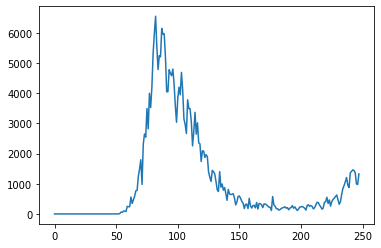

In [41]:
merged_df.new_cases.plot()

In [44]:
merged_df.set_index('date', inplace=True)

In [45]:
merged_df

,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
date,,,,,,,,,,,,,,,
2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0,Italy,Europe,60461828.0,83.51,3.18,35220.084


In [47]:
merged_df.loc['2020-09-01']

new_cases                             996
new_deaths                              6
new_tests                           54395
year                                 2020
month                                   9
day                                     1
weekday                                 1
total_cases                        269660
total_deaths                        35483
location                            Italy
continent                          Europe
population                    6.04618e+07
life_expectancy                     83.51
hospital_beds_per_thousand           3.18
gdp_per_capita                    35220.1
Name: 2020-09-01 00:00:00, dtype: object

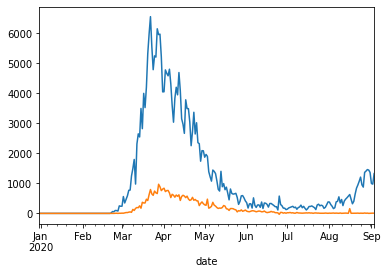

In [49]:
merged_df.new_cases.plot()
merged_df.new_deaths.plot();

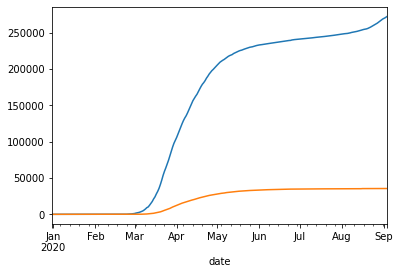

In [50]:
merged_df.total_cases.plot()
merged_df.total_deaths.plot();

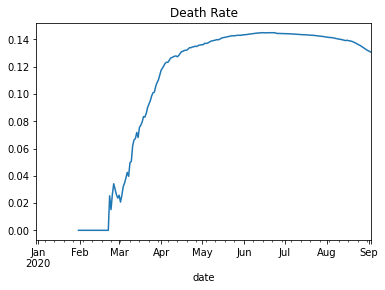

In [51]:
death_rate = merged_df.total_deaths / merged_df.total_cases
death_rate.plot(title='Death Rate');

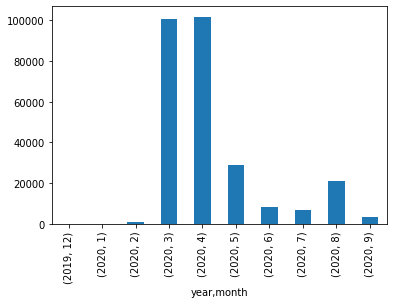

In [54]:
covid_month_df.new_cases.plot(kind='bar');

<AxesSubplot:xlabel='year,month'>

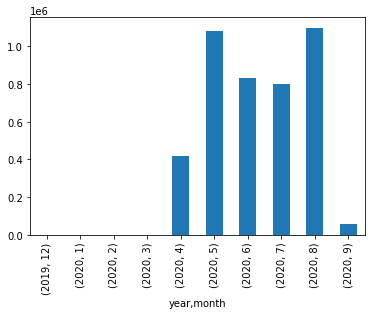

In [55]:
covid_month_df.new_tests.plot(kind='bar')